# Simple Analysis & Visualisation

By extracting quantitative measurements from an image we cross over from 'image analysis' to 'data analysis'.

This section briefly explains how to do basic data analysis and plotting, including boxplots, scatterplots and linear fits.

## Exercice 1 - read file & get summaries of result

In [1]:
# Familiarize yourself with the data structure of the results and summarize features of dataset.
# read the result with the read.table function from util package.
# get the summarize with the function summary from r base

result <- read.table(file = "./cell_results.txt", header = TRUE, sep = "\t")
summary(result)

 cell_actin_mean     cell_area       cell_id      cell_tubulin_mean
 Min.   :0.09633   Min.   :1160   Min.   : 1.00   Min.   :0.1040   
 1st Qu.:0.11995   1st Qu.:2228   1st Qu.:21.75   1st Qu.:0.1647   
 Median :0.12697   Median :3033   Median :42.50   Median :0.1796   
 Mean   :0.13463   Mean   :2980   Mean   :42.50   Mean   :0.1881   
 3rd Qu.:0.13766   3rd Qu.:3553   3rd Qu.:63.25   3rd Qu.:0.2031   
 Max.   :0.27911   Max.   :5571   Max.   :84.00   Max.   :0.3321   

## Exercises 2 - Visualization

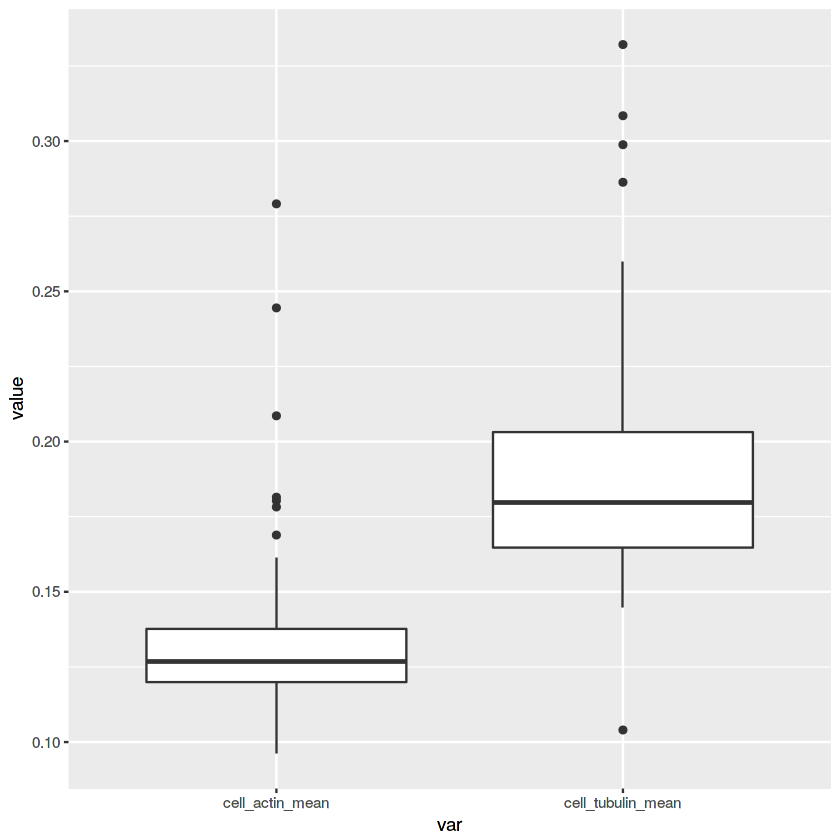

In [2]:
# Create a box plot showing the distribution of features cell_actin_mean and cell_tubulin_mean intensities. 
#  - Reorganize data thanks to package tidyr: takes multiple columns and collapses into key-value pairs 
# with the gather function.
#  - Rename columns with colnames function.
#  - Use the function geom_boxplot from ggplot2 package.Load package with library(ggplot2)
# Feel free to play around with the various options of the boxplot 
# function to make your plot look nicer.

library(tidyr)
data_result <- result[,c('cell_actin_mean','cell_tubulin_mean')]

df <- gather(data_result,key = 'var', value = c('cell_actin_mean','cell_tubulin_mean'))
colnames(df) <- c("var","value")

library(ggplot2)
p <- ggplot(df, aes(x = var, y = value))
p + geom_boxplot()

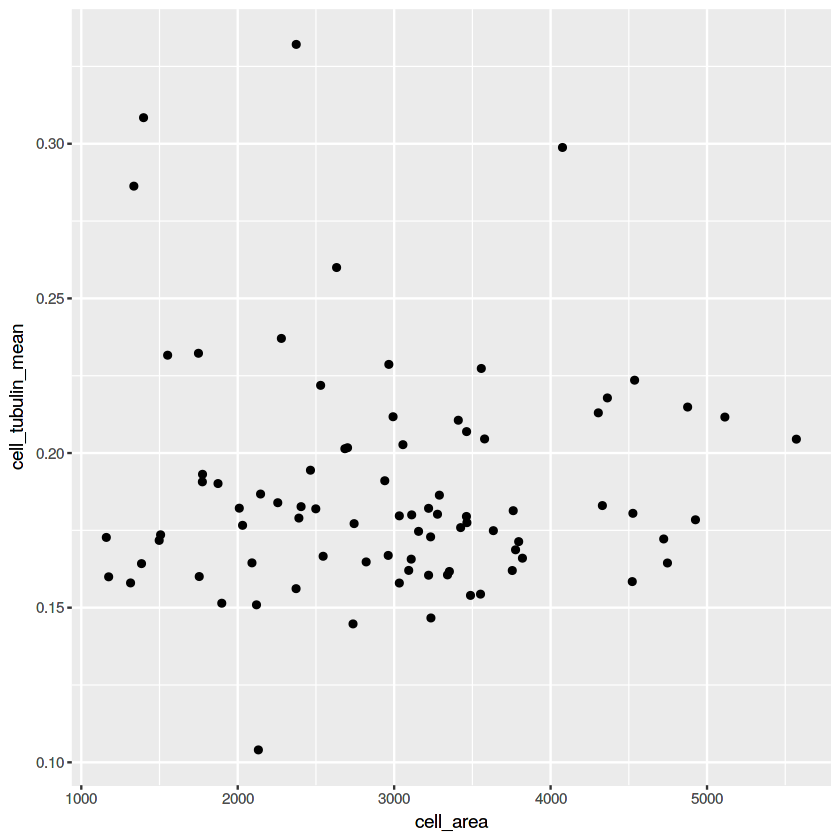

In [3]:
# (iii) Create a scatter plot of cell tubulin intensity over cell area
# Use the function geom_point for this.
ggplot(result, aes(x=cell_area, y=cell_tubulin_mean)) + geom_point()


# Simple linear regression

**Background**

The simple linear regression is used to predict a quantitative outcome y on the basis of one single predictor variable x. The goal is to build a mathematical model (or formula) that defines y as a function of the x variable.
Once, we built a statistically significant model, it’s possible to use it for predicting future outcome on the basis of new x values.

## Exercises 3 - Linear regression

In [4]:
# (i) Perform a linear fit of cell tubulin mean over cell area
# The simple linear regression tries to find the best line to predict tubulin intensity on the cell area.
# The linear model equation can be written as follow: cell_tubulin_mean = b0 + b1 * cell_area
# The R function lm() can be used to determine the beta coefficients of the linear model:

model <- lm(cell_tubulin_mean ~ cell_area, data = result)
model


Call:
lm(formula = cell_tubulin_mean ~ cell_area, data = result)

Coefficients:
(Intercept)    cell_area  
  1.902e-01   -6.956e-07  


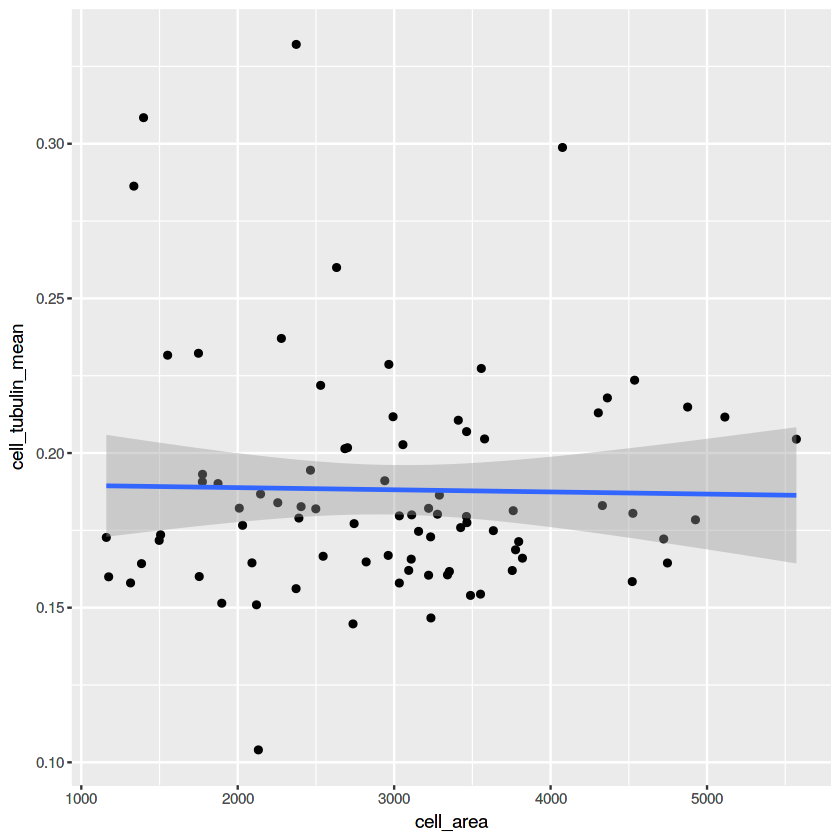

In [5]:
# (ii) Add the regression line onto the scatter plot.
# you can use the function stat_smooth() [ggplot2]. 
# By default, the fitted line is presented with confidence interval around it. 
# The confidence bands reflect the uncertainty about the line. If you don’t want to display it, 
# specify the option se = FALSE in the function stat_smooth().

ggplot(result, aes(x=cell_area, y=cell_tubulin_mean)) + geom_point() + stat_smooth(method = lm)

## Model assessment

**Background**

In the previous section, we built a linear model of tubulin intensity as a function of cell area.
    Before using this formula to predict future intensities, you should make sure that this model is 
    statistically significant, that is:
    there is a statistically significant relationship between the predictor and the outcome variables
    the model that we built fits very well the data in our hand.
In this section, we’ll describe how to check the quality of a linear regression model.

## Execises 4 - Cheking the  quality of the model

In [6]:
# Displaying the statistical summary of the model using the R function summary()
summary(model)


Call:
lm(formula = cell_tubulin_mean ~ cell_area, data = result)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.084708 -0.022705 -0.008332  0.015176  0.143562 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.902e-01  1.253e-02  15.180   <2e-16 ***
cell_area   -6.956e-07  3.982e-06  -0.175    0.862    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03689 on 82 degrees of freedom
Multiple R-squared:  0.000372,	Adjusted R-squared:  -0.01182 
F-statistic: 0.03052 on 1 and 82 DF,  p-value: 0.8618


In [7]:
# Understand the output
# 1) What does this Residual standard error means ?
# 2) What does this R-squared / Adjusted R-squared means ?
# 3) What does this p-value means ?